# **Machine Problem: Bayesian Network for Healthcare Diagnosis**

# Exercise 1: Setting Up the Environment

**Install Libraries**

In [1]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.1 MB/s eta 0:00:00


**Import Libraries**

In [2]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from pgmpy.estimators import MaximumLikelihoodEstimator

# Exercise 2: Define the Bayesian Network Structure

**Defining the Variables and Relationships**

In [3]:
model = BayesianNetwork([
    ('Age', 'HeartDisease'),
    ('Smoking', 'HeartDisease'),
    ('Exercise', 'HeartDisease'),
    ('Cholesterol', 'HeartDisease'),
    ('BloodPressure', 'HeartDisease'),
    ('HeartDisease', 'ChestPain'),
    ('HeartDisease', 'ECGResult')
])

# Exercise 3: Define Conditional Probability Tables (CPTs)

**Create CPTs Using pgmpy**

In [4]:
cpd_age = TabularCPD(variable='Age', variable_card=3, values=[[0.3], [0.4], [0.3]])

cpd_smoking = TabularCPD(variable='Smoking', variable_card=2, values=[[0.5], [0.5]])

cpd_exercise = TabularCPD(variable='Exercise', variable_card=2, values=[[0.6], [0.4]])

cpd_cholesterol = TabularCPD(variable='Cholesterol', variable_card=2, values=[[0.5], [0.5]])

cpd_bloodpressure = TabularCPD(variable='BloodPressure', variable_card=2, values=[[0.5], [0.5]])

cpd_heartdisease = TabularCPD(variable='HeartDisease', variable_card=2,
                              values=[[0.9, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1,
                                       0.8, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05,
                                       0.7, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01,
                                       0.6, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005,
                                       0.5, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001,
                                       0.4, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005],
                                     [0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                       0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95,
                                       0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99,
                                       0.4, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.995,
                                       0.5, 0.7, 0.8, 0.9, 0.95, 0.99, 0.995, 0.999,
                                       0.6, 0.8, 0.9, 0.95, 0.99, 0.995, 0.999, 0.9995]],
                              evidence=['Age', 'Smoking', 'Exercise', 'Cholesterol', 'BloodPressure'],
                              evidence_card=[3, 2, 2, 2, 2])

cpd_chestpain = TabularCPD(variable='ChestPain', variable_card=2,
                           values=[[0.8, 0.2], [0.2, 0.8]],
                           evidence=['HeartDisease'],
                           evidence_card=[2])

cpd_ecgresult = TabularCPD(variable='ECGResult', variable_card=2,
                           values=[[0.9, 0.1], [0.1, 0.9]],
                           evidence=['HeartDisease'],
                           evidence_card=[2])

model.add_cpds(cpd_age, cpd_smoking, cpd_exercise, cpd_cholesterol, cpd_bloodpressure, cpd_heartdisease, cpd_chestpain, cpd_ecgresult)

# Exercise 4: Inference in the Bayesian Network

**Perform Probabilistic Inference**

In [5]:
infer = VariableElimination(model)

evidence = {'Age': 1, 'Smoking': 1, 'Cholesterol': 1, 'BloodPressure': 1}
result = infer.query(variables=['HeartDisease'], evidence=evidence)
print(result)

evidence = {'ChestPain': 1}
result = infer.query(variables=['ECGResult'], evidence=evidence)
print(result)

+-----------------+---------------------+
| HeartDisease    |   phi(HeartDisease) |
+=================+=====================+
| HeartDisease(0) |              0.1220 |
+-----------------+---------------------+
| HeartDisease(1) |              0.8780 |
+-----------------+---------------------+
+--------------+------------------+
| ECGResult    |   phi(ECGResult) |
+==============+==================+
| ECGResult(0) |           0.1750 |
+--------------+------------------+
| ECGResult(1) |           0.8250 |
+--------------+------------------+


**Posterior Probability Analysis**

In [6]:
evidence = {'Exercise': 1}
result = infer.query(variables=['HeartDisease'], evidence=evidence)
print(result)

+-----------------+---------------------+
| HeartDisease    |   phi(HeartDisease) |
+=================+=====================+
| HeartDisease(0) |              0.0912 |
+-----------------+---------------------+
| HeartDisease(1) |              0.9088 |
+-----------------+---------------------+


# Exercise 5: Parameter Learning from Simulated Data

**Simulate a Healthcare Dataset**

In [7]:
data = pd.DataFrame({
    'Age': np.random.choice([0, 1, 2], size=1000, p=[0.3, 0.4, 0.3]),
    'Smoking': np.random.choice([0, 1], size=1000, p=[0.5, 0.5]),
    'Exercise': np.random.choice([0, 1], size=1000, p=[0.6, 0.4]),
    'Cholesterol': np.random.choice([0, 1], size=1000, p=[0.5, 0.5]),
    'BloodPressure': np.random.choice([0, 1], size=1000, p=[0.5, 0.5]),
    'HeartDisease': np.random.choice([0, 1], size=1000, p=[0.5, 0.5]),
    'ChestPain': np.random.choice([0, 1], size=1000, p=[0.5, 0.5]),
    'ECGResult': np.random.choice([0, 1], size=1000, p=[0.5, 0.5])
})

**Estimate Parameters**

In [8]:
model.fit(data, estimator=MaximumLikelihoodEstimator)

for cpd in model.get_cpds():
    print(cpd)

+--------+-------+
| Age(0) | 0.315 |
+--------+-------+
| Age(1) | 0.364 |
+--------+-------+
| Age(2) | 0.321 |
+--------+-------+
+------------+-------+
| Smoking(0) | 0.489 |
+------------+-------+
| Smoking(1) | 0.511 |
+------------+-------+
+-------------+-------+
| Exercise(0) | 0.588 |
+-------------+-------+
| Exercise(1) | 0.412 |
+-------------+-------+
+----------------+-------+
| Cholesterol(0) | 0.488 |
+----------------+-------+
| Cholesterol(1) | 0.512 |
+----------------+-------+
+------------------+------+
| BloodPressure(0) | 0.51 |
+------------------+------+
| BloodPressure(1) | 0.49 |
+------------------+------+
+-----------------+------------------+-----+--------------------+------------------+
| Age             | Age(0)           | ... | Age(2)             | Age(2)           |
+-----------------+------------------+-----+--------------------+------------------+
| BloodPressure   | BloodPressure(0) | ... | BloodPressure(1)   | BloodPressure(1) |
+----------------

# Exercise 6: Network Visualization and Analysis

**Visualize the Network**

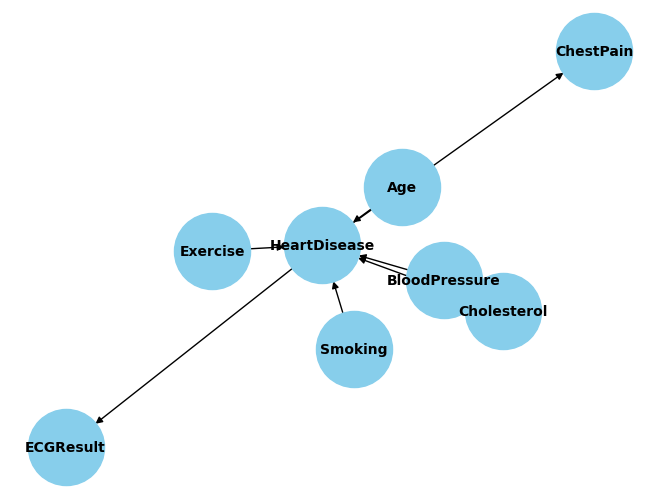

In [9]:
nx_model = nx.DiGraph(model.edges())

pos = nx.spring_layout(nx_model)

nx.draw(nx_model, pos, with_labels=True, node_size=3000, node_color='skyblue',
        font_size=10, font_weight='bold')

plt.show()

**Sensitivity Analysis**

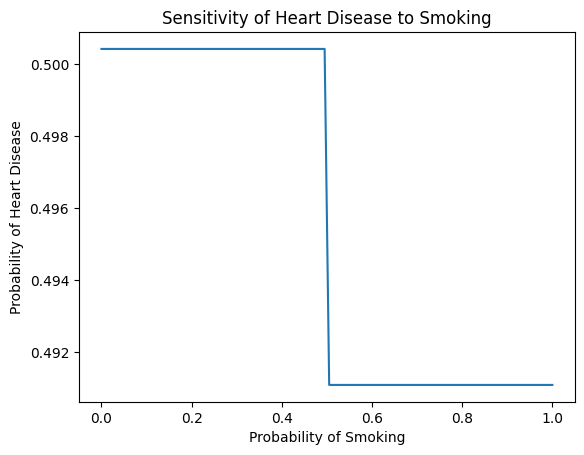

In [10]:
import numpy as np
import matplotlib.pyplot as plt

threshold = 0.5

smoking_probabilities = np.linspace(0, 1, 100)
heart_disease_probabilities = []

for p in smoking_probabilities:
    smoking_state = 1 if p > threshold else 0
    evidence = {'Smoking': smoking_state}

    result = infer.query(variables=['HeartDisease'], evidence=evidence)
    heart_disease_probabilities.append(result.values[1])

plt.plot(smoking_probabilities, heart_disease_probabilities)
plt.xlabel('Probability of Smoking')
plt.ylabel('Probability of Heart Disease')
plt.title('Sensitivity of Heart Disease to Smoking')
plt.show()